# Machine Learning Project : Glass Classification
Navin Singh
* Bangalore 
* Date-->  17/01/2024,
# Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-

Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)

•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

Predict : Type of glass

Dataset Link-

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Glass%20Identification/Glass%20Identification.csv

# importing Some Important Library

In [2]:
# For data loading and manipulation
import pandas as pd
import numpy as np
from sklearn import datasets

# For Visualization/EDA
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

# For data science and machine learning techniques
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To create the interactive components
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import Data Set
df=pd.read_csv('Glass_identification')

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [6]:
df.shape

(214, 10)

In [7]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [8]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

There are no any null values

<Axes: >

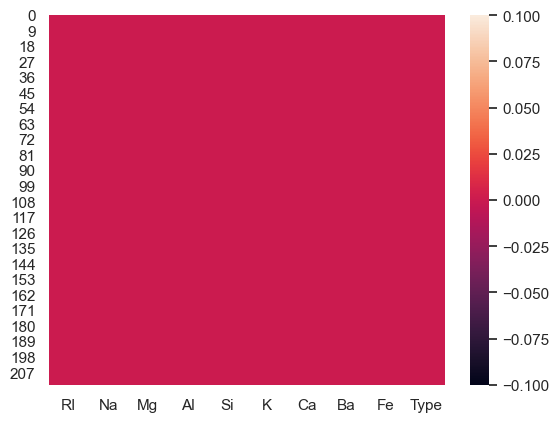

In [9]:
sns.heatmap(df.isnull())

Here we can clearly see that, there are no any null values 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [11]:
df.describe(include='all')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Now that we have got a glimpse of the dataset, we know that it doesn't have any null values and all the attributes are numerical. Even the type which is categorical in nature is represented as integers. Please note there is no order among the classes.

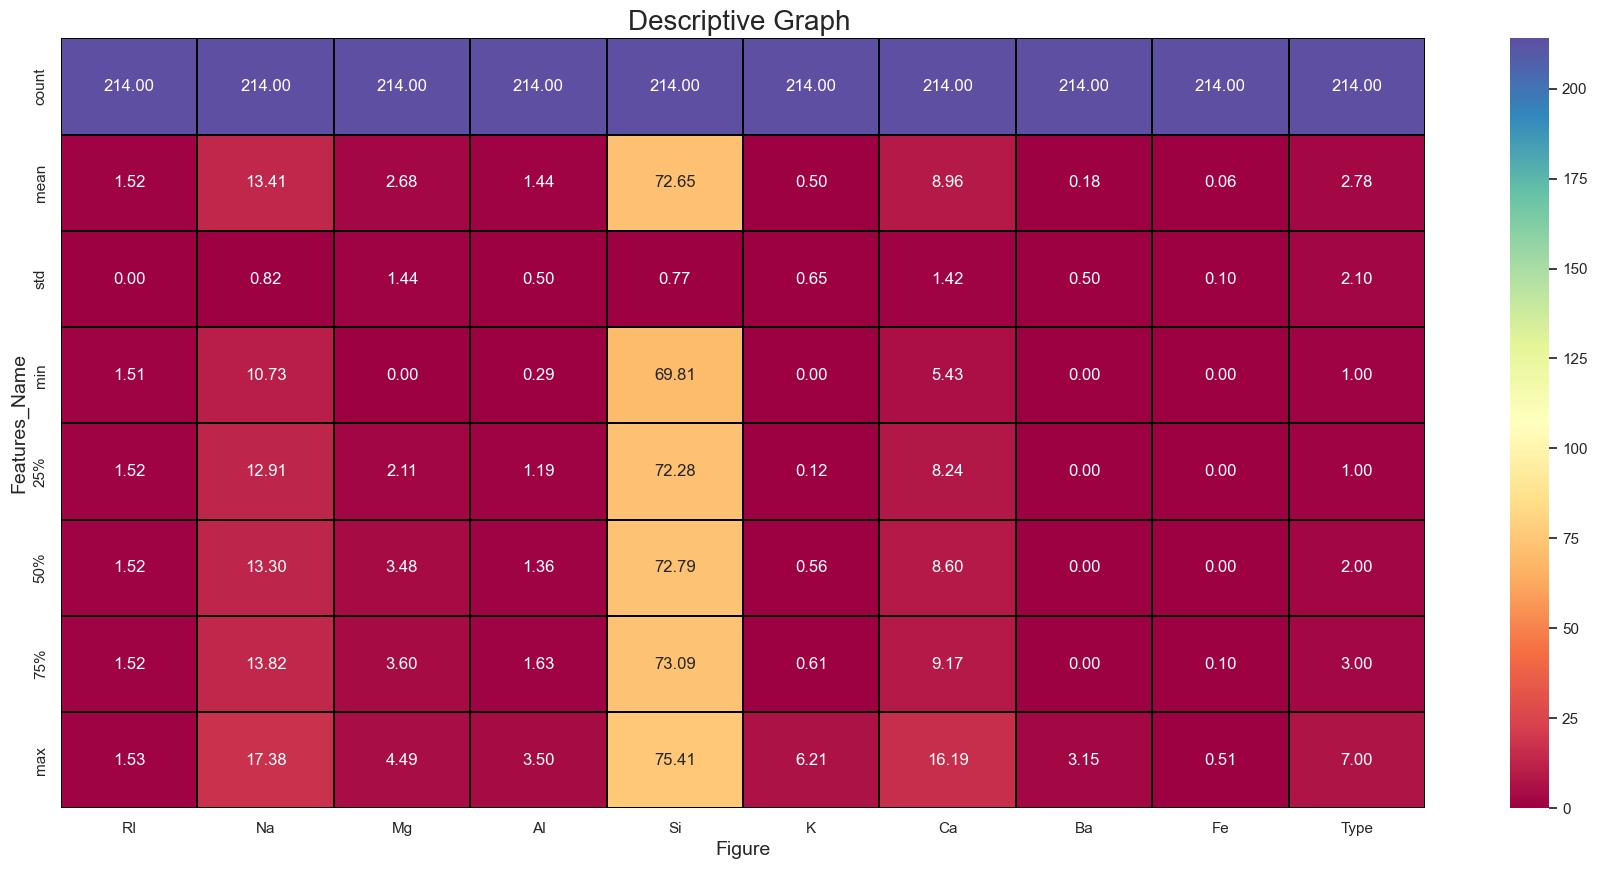

In [12]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True, fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph ', fontsize=20)
plt.show()

In [13]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


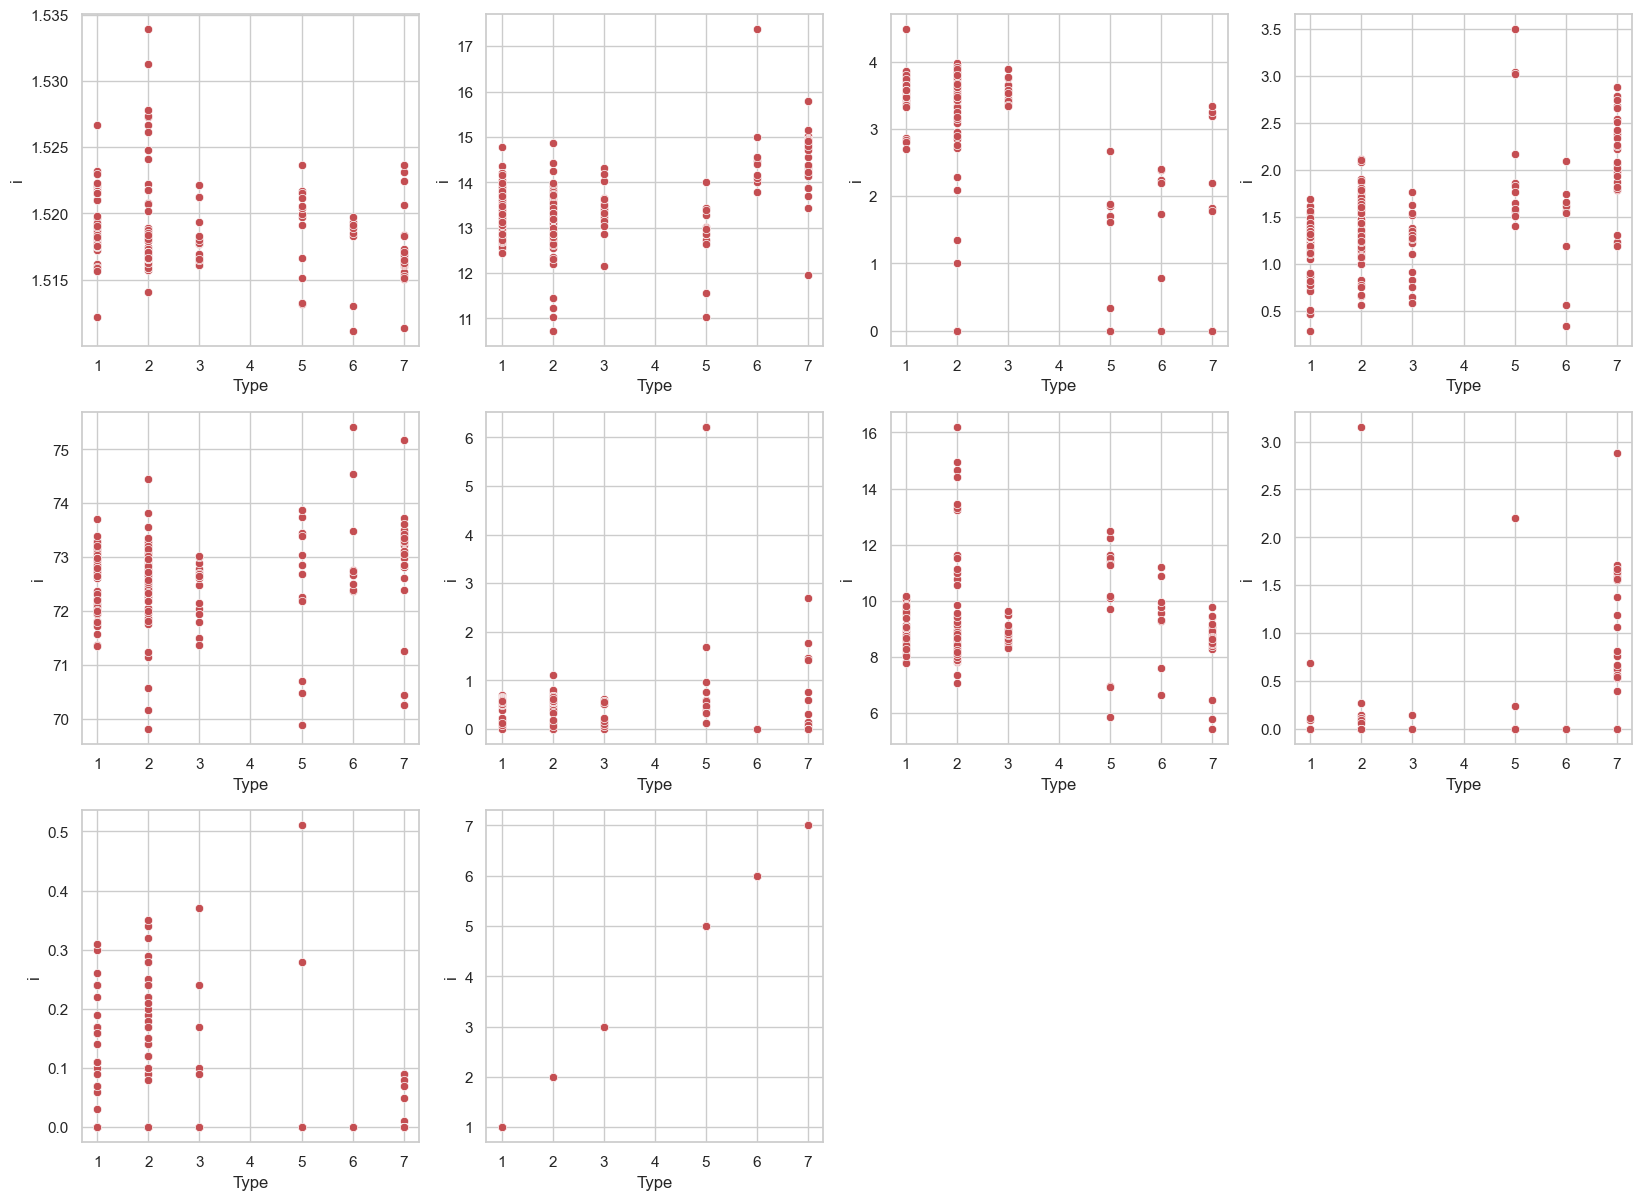

In [14]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x='Type',y=i,data=df,color='r')
        plt.xlabel('Type')
        plt.ylabel('i')
    p+=1
    
plt.show()

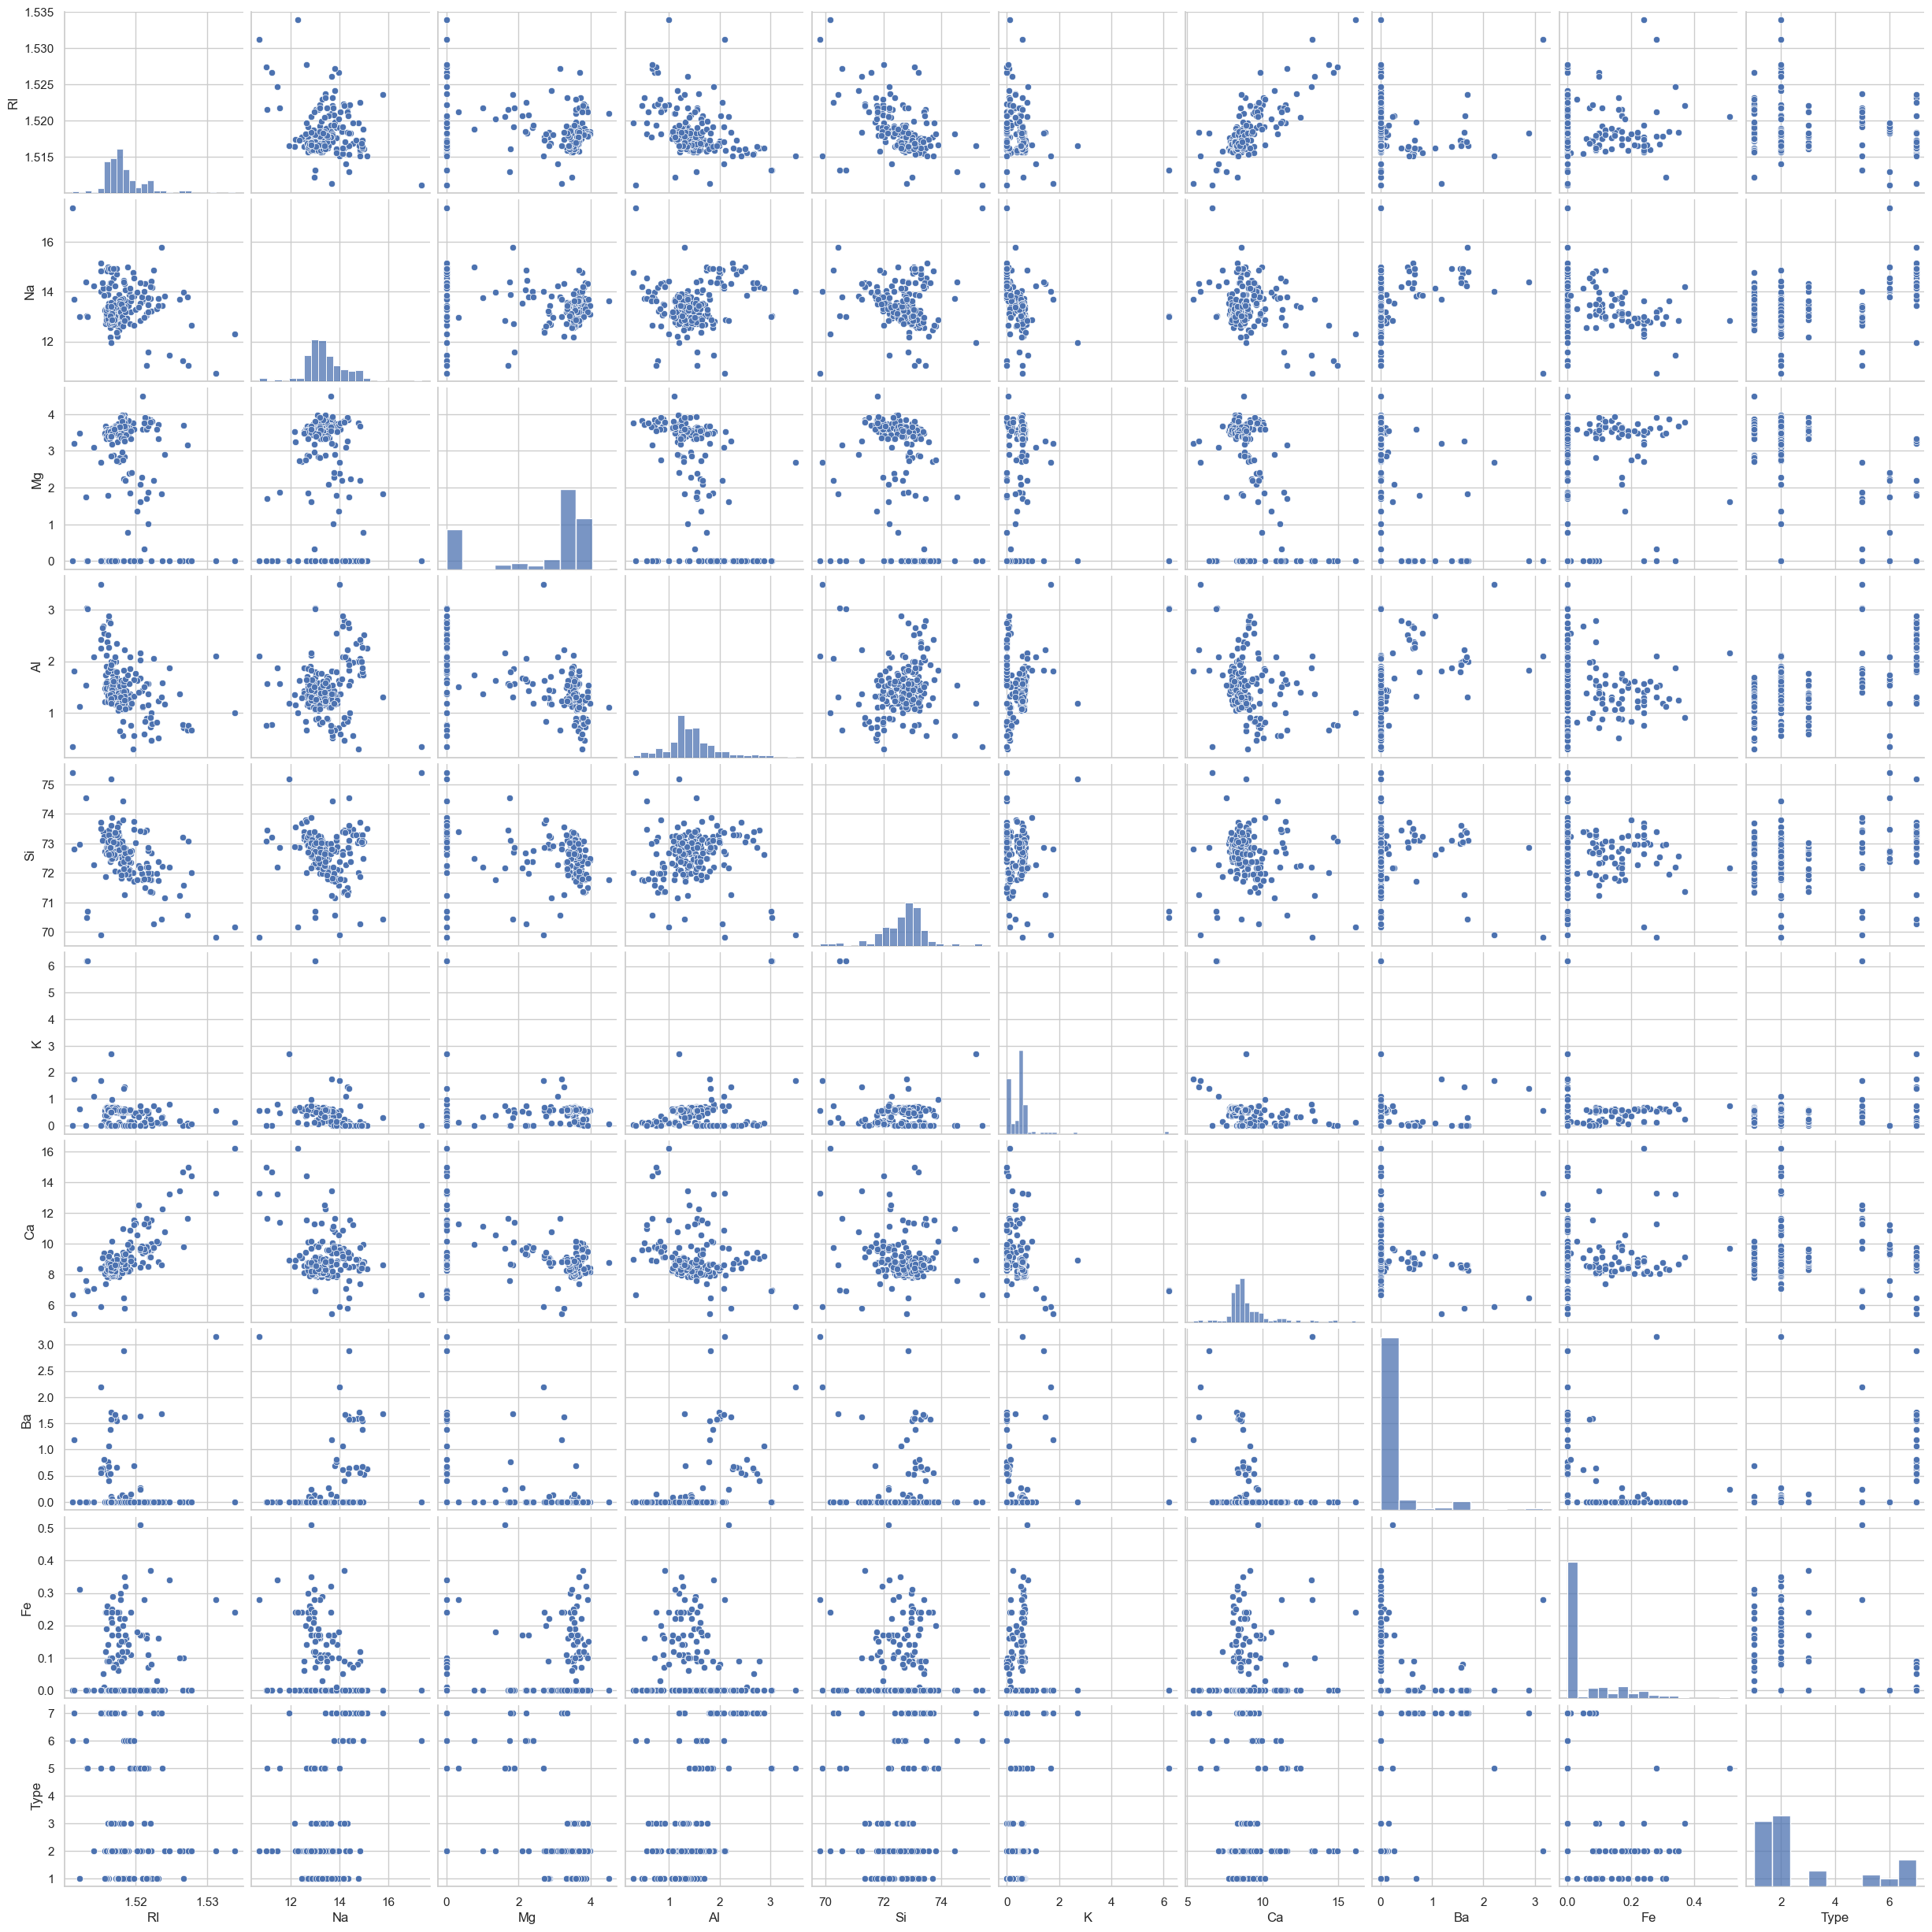

In [15]:
sns.pairplot(data=df, palette='Dark2')

the pairplot gives the pariwise relation between the features. On the diagonal we can notice the distribution plots.

In [16]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


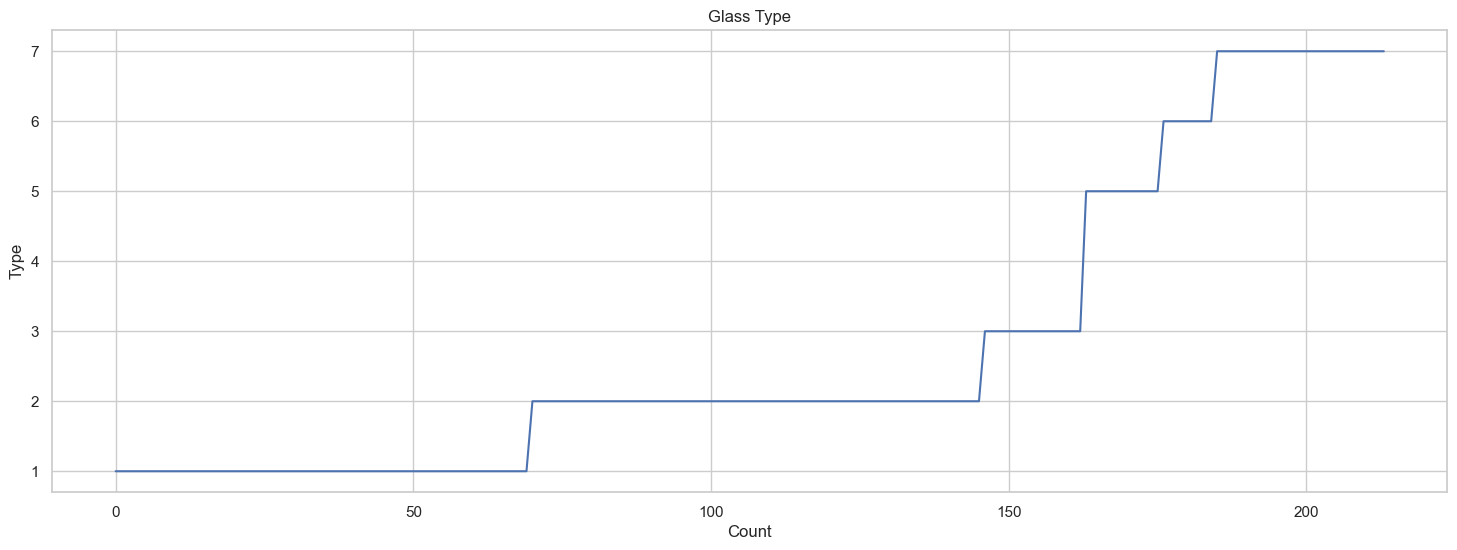

In [17]:
plt.figure(figsize=(18,6))
plt.plot(df.Type, label='closing price')
plt.ylabel('Type')
plt.xlabel('Count')
plt.title('Glass Type')
plt.show()

Text(0.5, 1.0, 'Type of Glass')

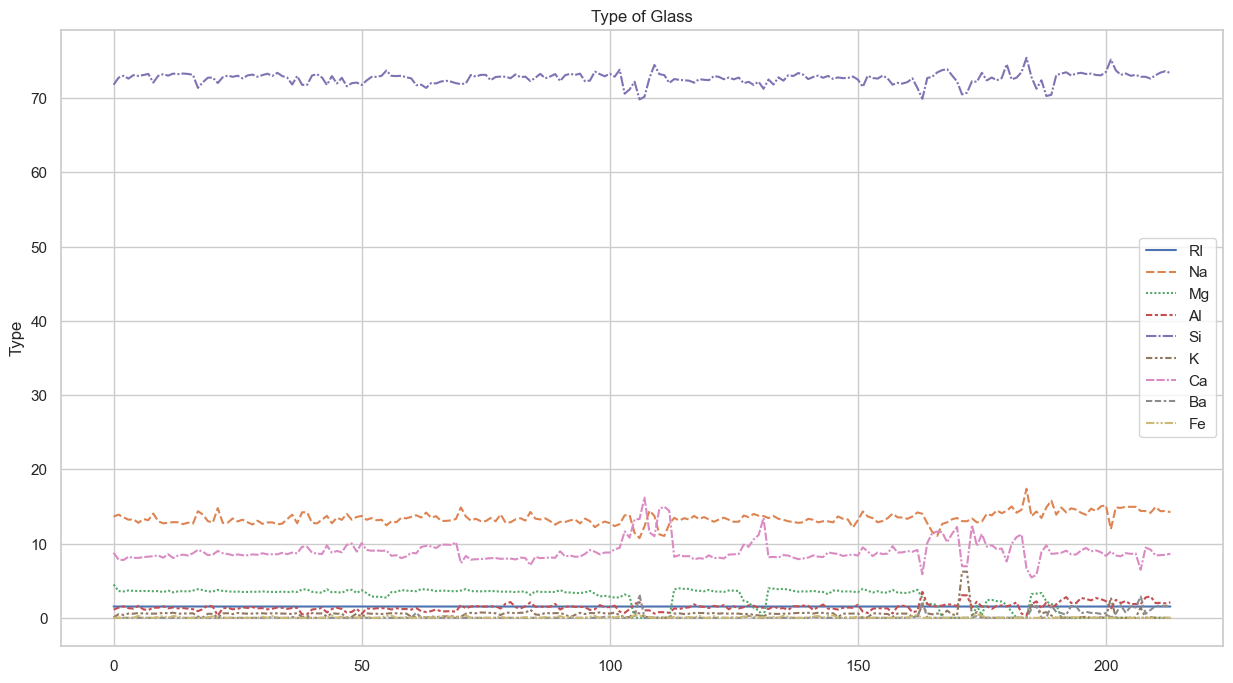

In [18]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df.iloc[:,:-1])
plt.ylabel('Type')
plt.title('Type of Glass')

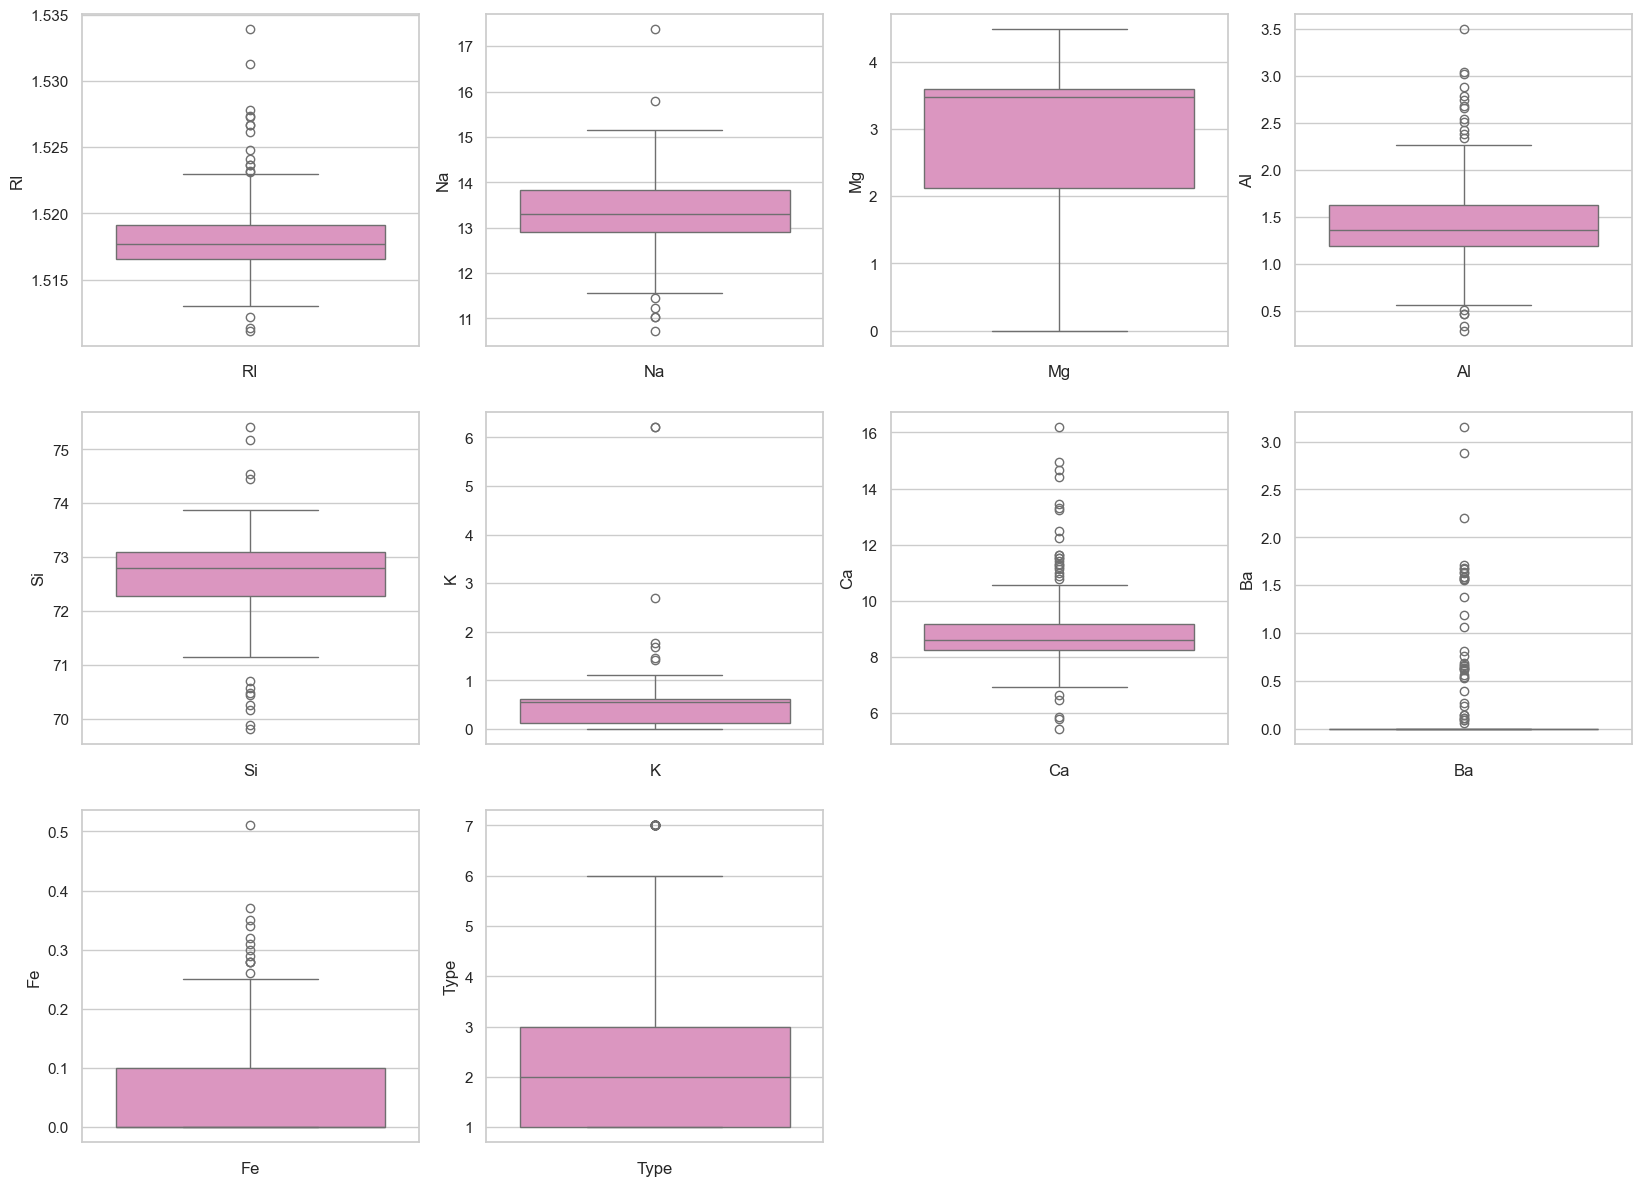

In [19]:
## Lets check the outliers by plotting boxplot.
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette='Set2_r')
        plt.xlabel(i)
        
    p+=1
plt.show()

Here we can found the outliers 

In [20]:
df.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [21]:
from scipy.stats import zscore
out_features=df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']]
z=np.abs(zscore(out_features))
z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451,0.848275
1,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451,0.848275
2,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451,0.848275
3,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451,0.848275
4,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451,0.848275
...,...,...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451,2.010478
210,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451,2.010478
211,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451,2.010478
212,0.612399,1.193270,1.865511,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451,2.010478


In [22]:
# thereshold=3
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

Thsi are the outliers present in the columns

In [23]:
z.iloc[23,3]

0.19053645125684626

In [24]:
df1=df[(z<3).all(axis=1)]

In [25]:
df1=df[(z<3).all(axis=1)]

In [26]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


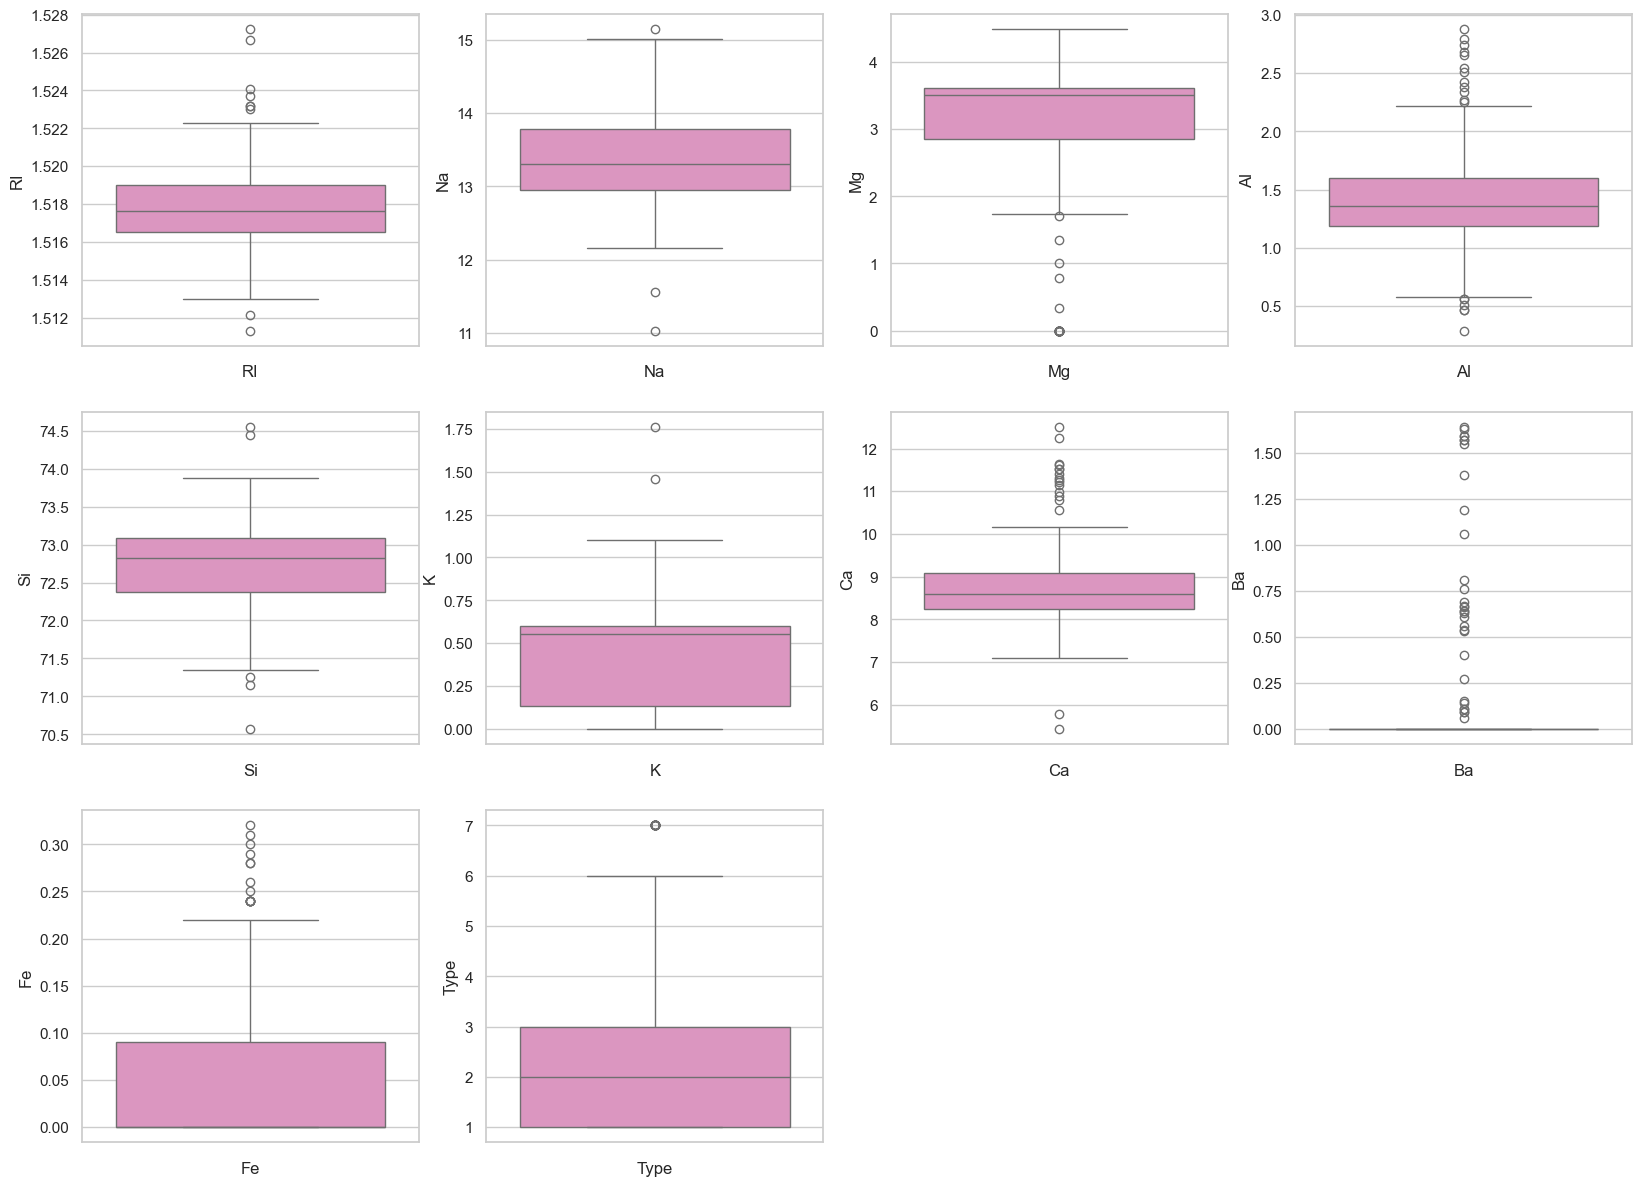

In [27]:
## Lets check the outliers by plotting boxplot.
plt.figure(figsize=(20,25))
p=1
for i in df1:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df1[i], palette='Set2_r')
        plt.xlabel(i)
        
    p+=1
plt.show()

In [28]:
print(df.shape)
print(df1.shape)

(214, 10)
(194, 10)


In [29]:
# shape of old and New DataFrame
print("Old Data Frame- ", df.shape[0])
print("New Data Frame- ", df1.shape[0])

Old Data Frame-  214
New Data Frame-  194


In [30]:
# Checking Percentage how many % of data are removed
print('Data Loss Precentage-',((df.shape[0]-df1.shape[0])/df.shape[0])*100 )

Data Loss Precentage- 9.345794392523365


# Exploratory Data Analyses
Let us check how many instances of each type are there in our dataset

<Axes: title={'center': 'Count plot'}, ylabel='count'>

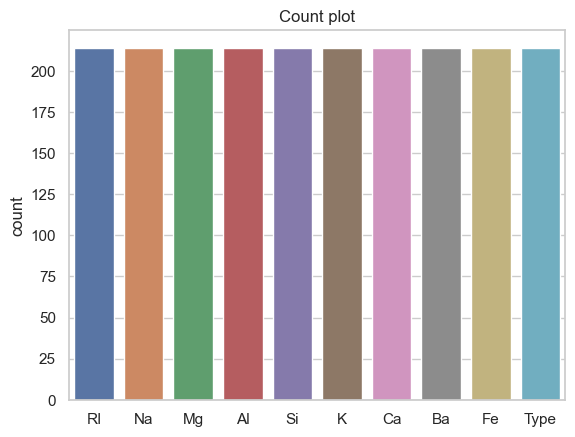

In [31]:
plt.title('Count plot')
sns.countplot(df)

In [32]:
# Checked both mean and median. mean seemed more informative
df.groupby('Type', as_index=False).mean()

,Type,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


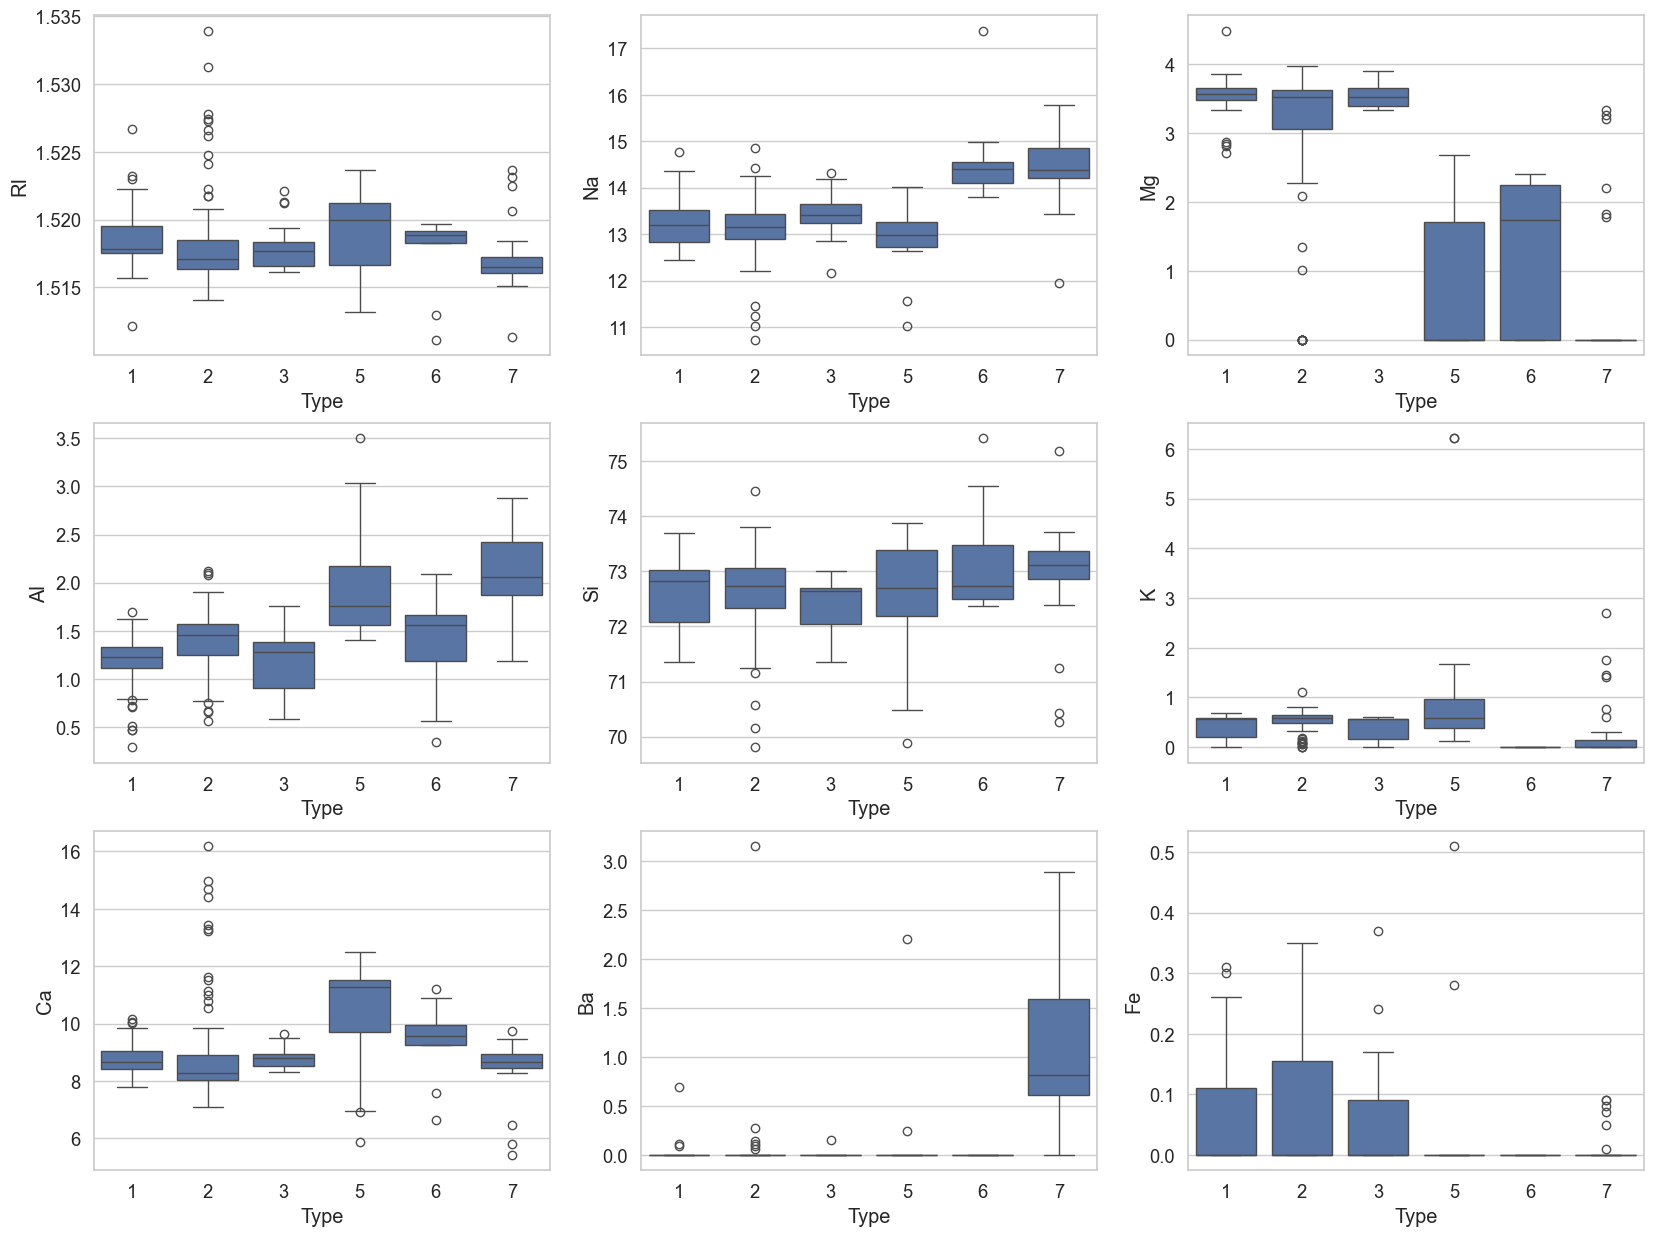

In [33]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=df)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=df)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=df)
plt.show()

The box plot shows that average Refractive index is similar for all types. Although, Type 5 has a wider range and slightly higher mean. Sodium content is higher in Type 6 & 7, whereas Magnesium content is fairly high in Type 1, 2 & 3. Aluminium is higher in type 5 & 7. Silica does not provide much information to differentiate as it has the highest concentration amongst all the minerals but has similar range for all types. Potassium also doesn't provide much insight. But it's higher in type 5, containers, because K is used in toughened glass which are used to make pyrex items. Calcium is highest in type 5 and Barium in type 7. Iron is present in extremely low concentration, yet type 1, 2 & 3 have high values for some glasses than the rest. This is because Iron is added mainly in colored glasses.

We got some idea on which feature provides more insight in differentiating one type from another. Now, let's see the relationship between each one of them through a pairplot. (We will leave out K, Ba and Fe due to sparse concentration)

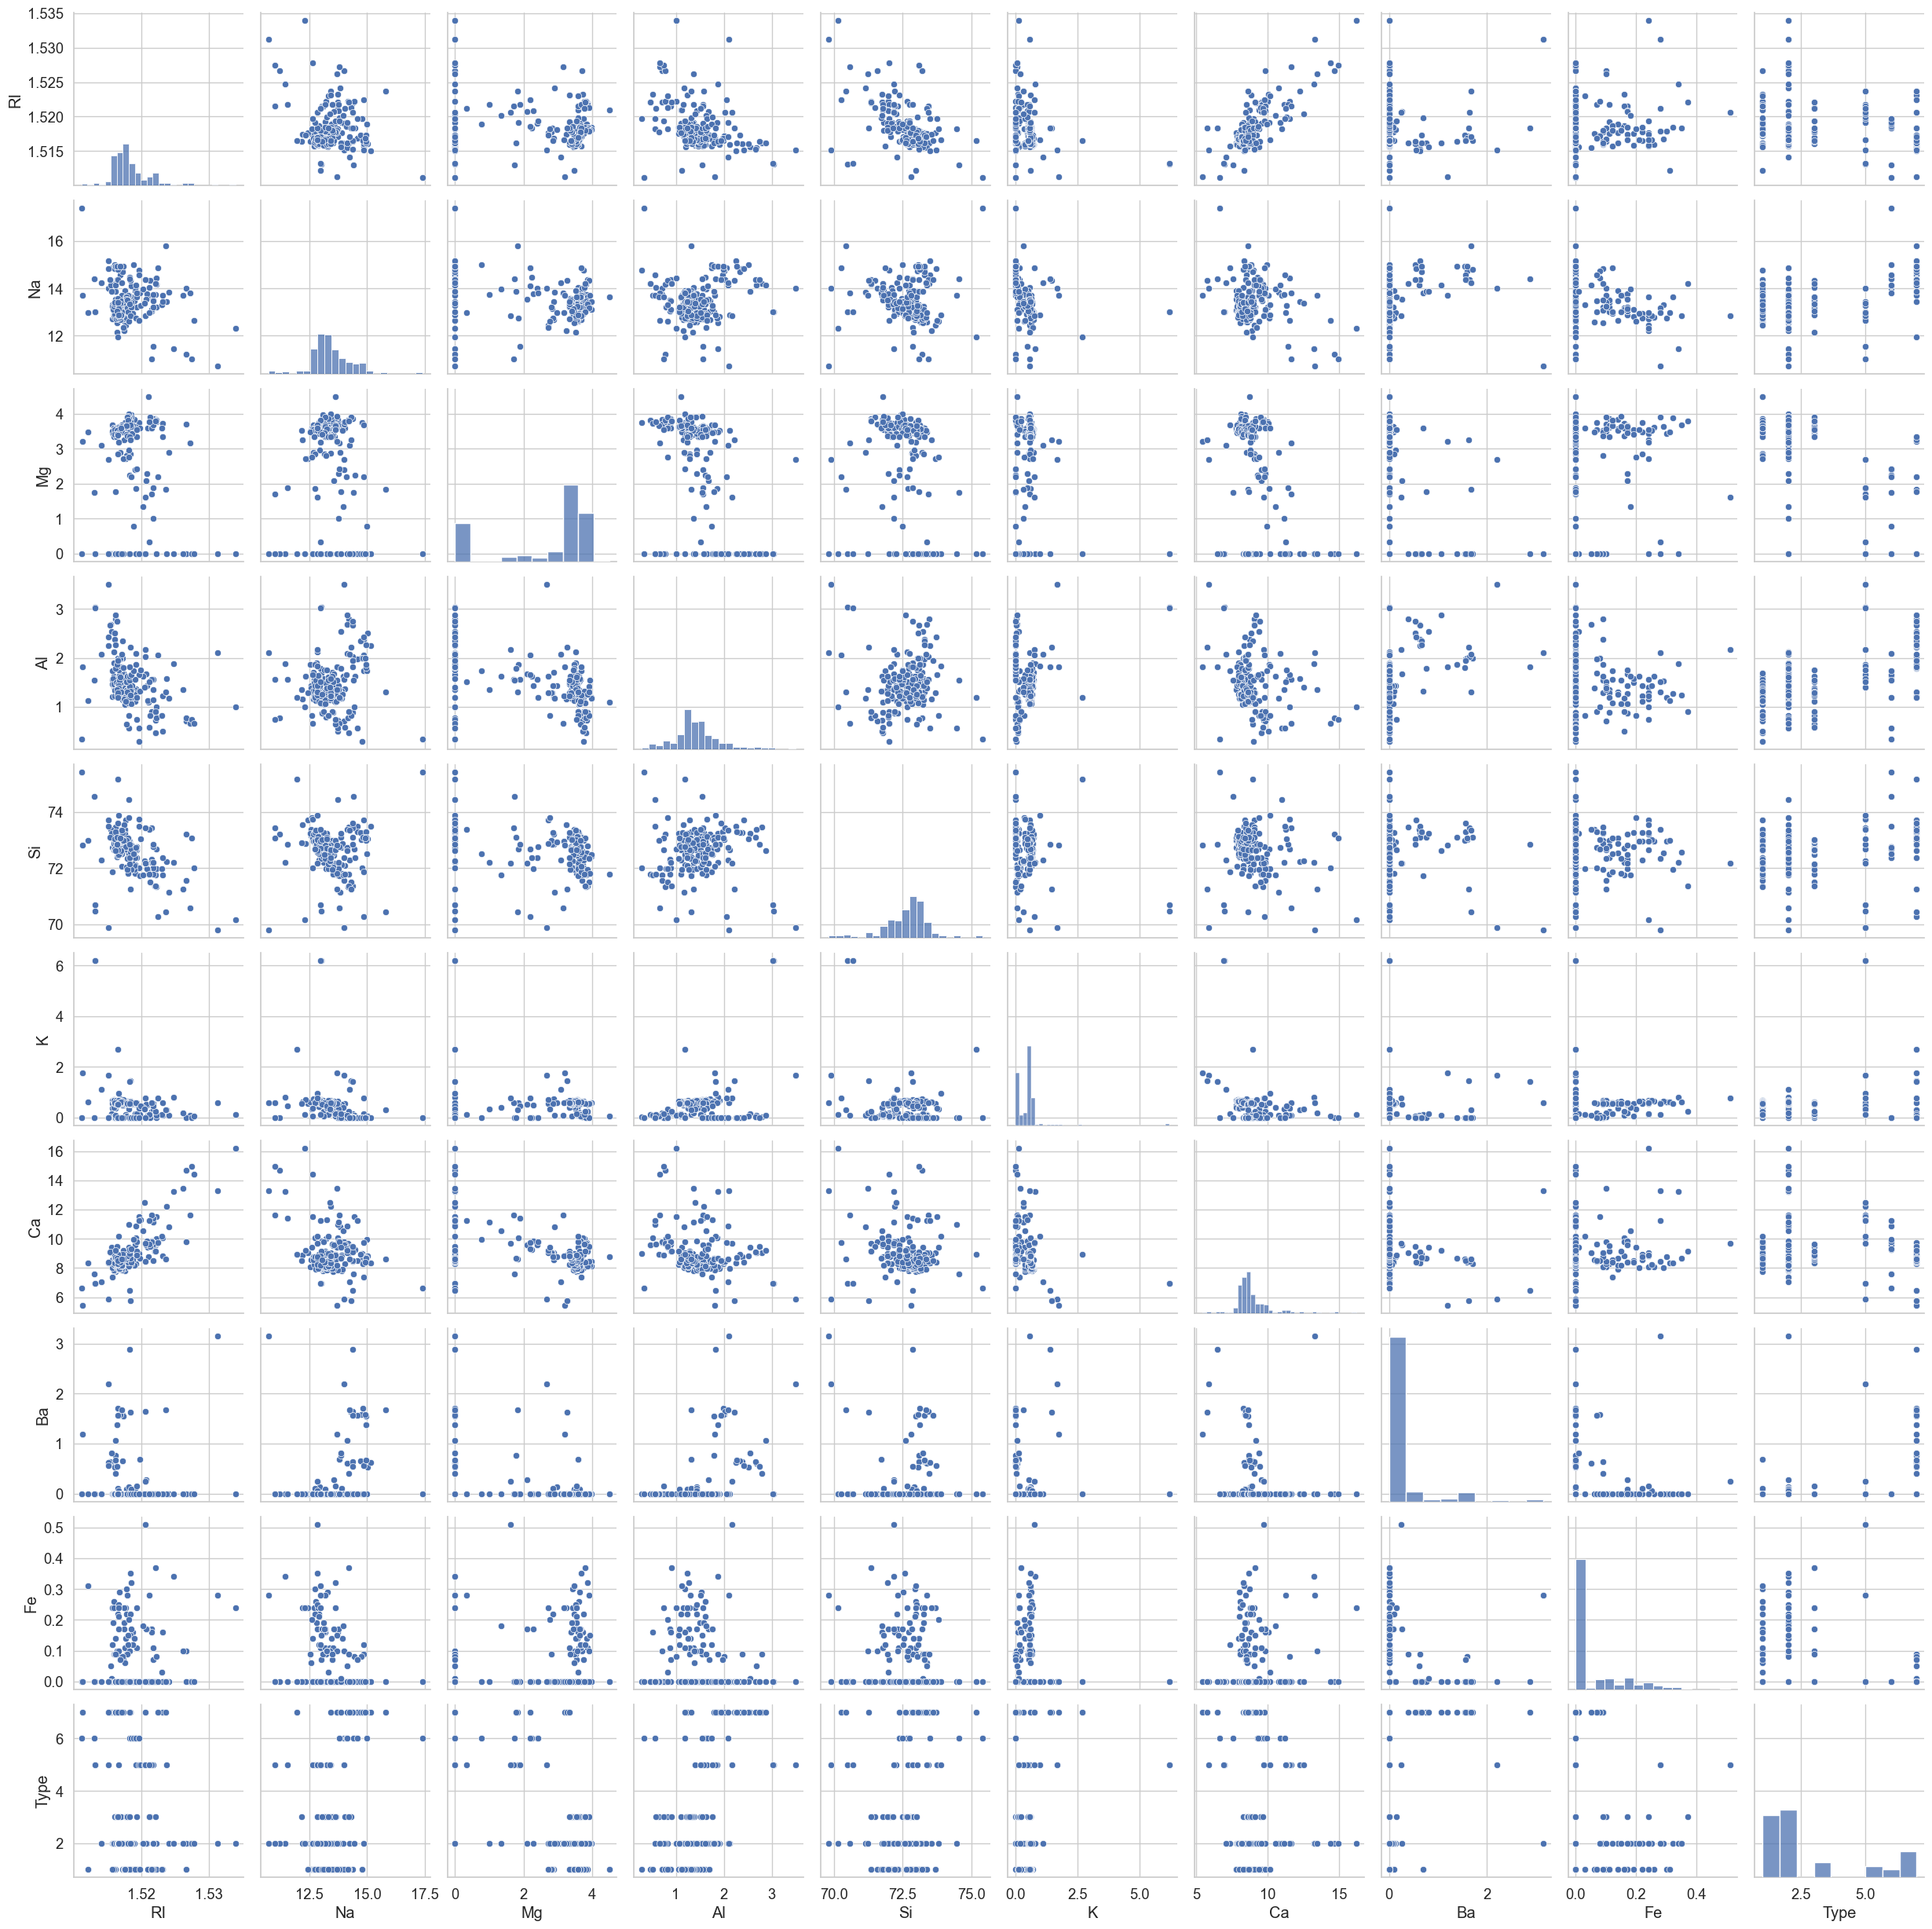

In [34]:
sns.pairplot(df)

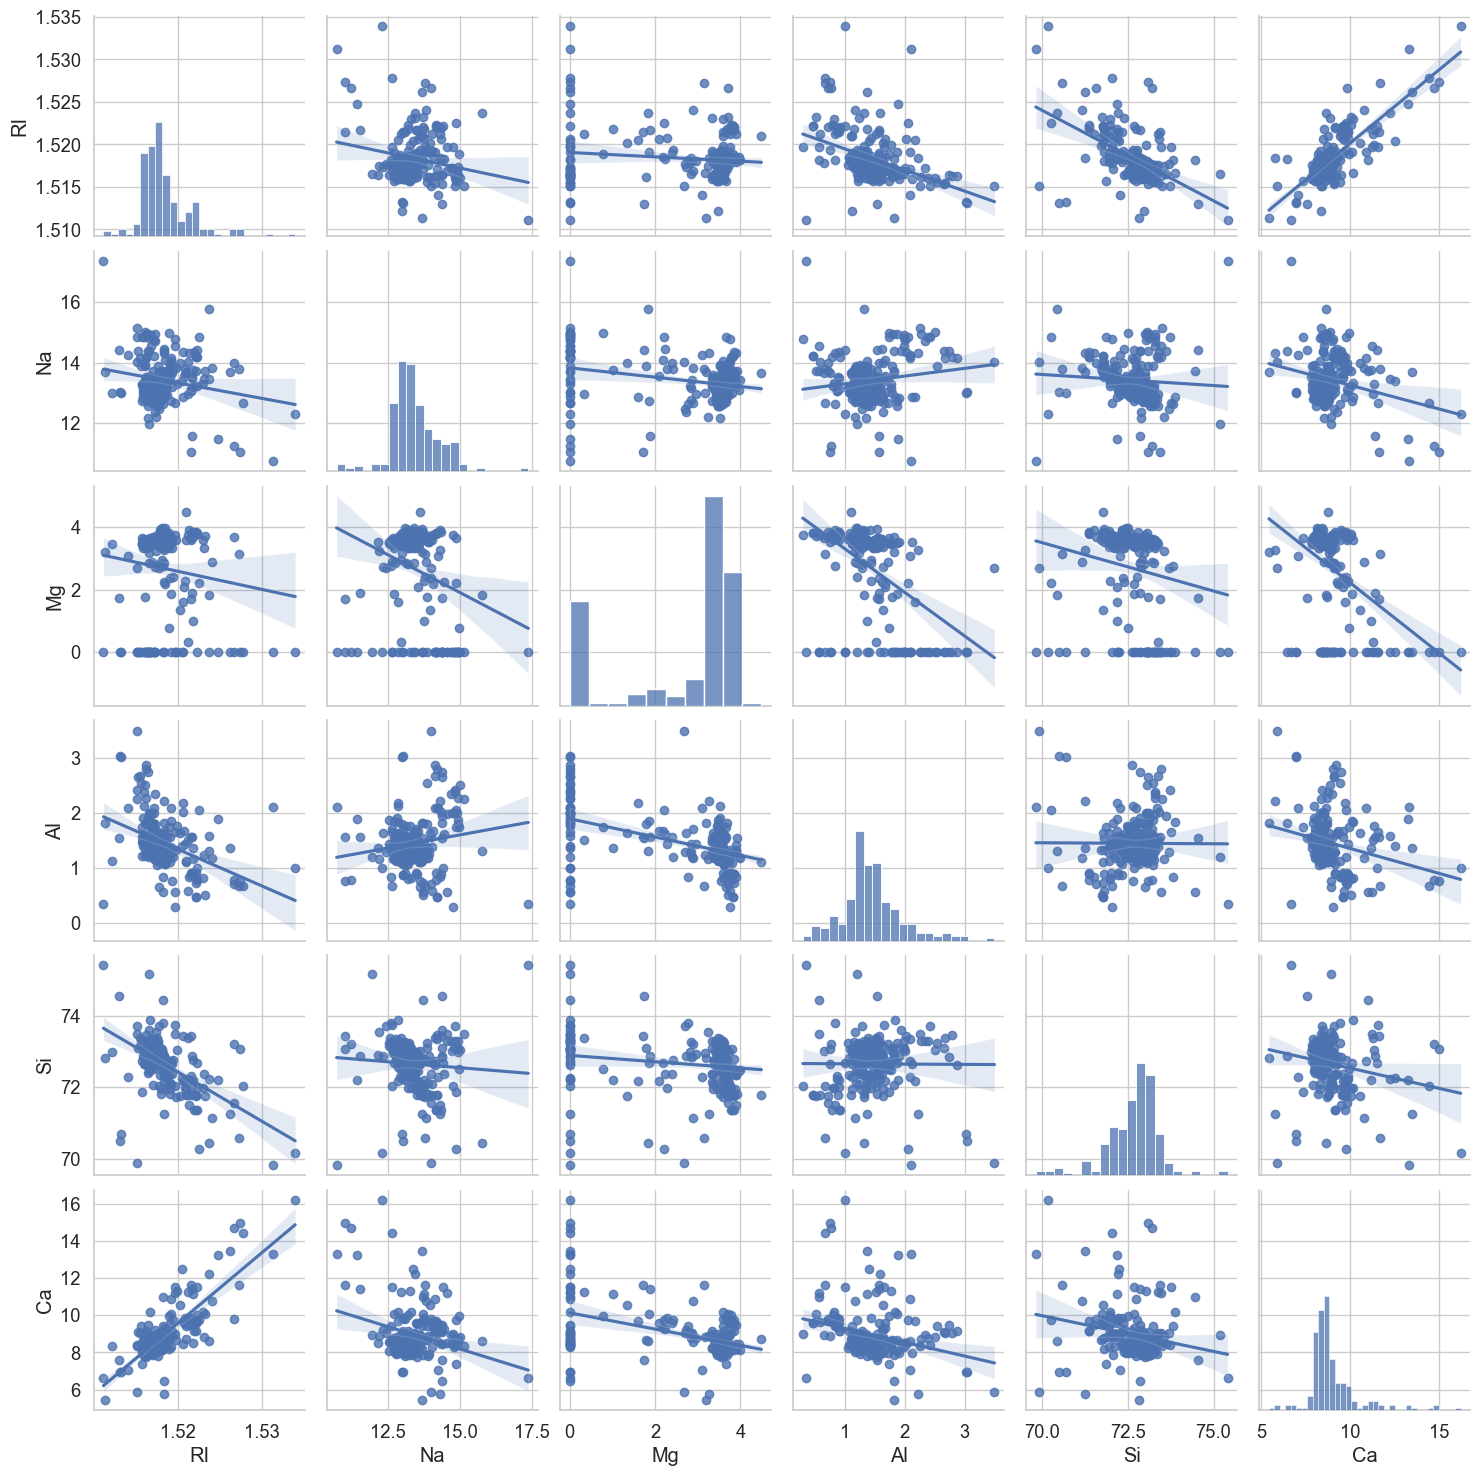

In [35]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(df[['RI','Na','Mg','Al','Si','Ca']], kind='reg')

On most dimensions, the points are scattered. But we can clearly see some strong relationship between Calcium and Refractive index. Silica and RI seem to have an inverse relationship.

Type 1,2 & 3 have very similar properties. However, we can distinguish them based on whether they are flat or not. Basically, float process is used to flatten the glass into sheets. Let us see the density plot of flat vs non-flat glass on some of the properties.

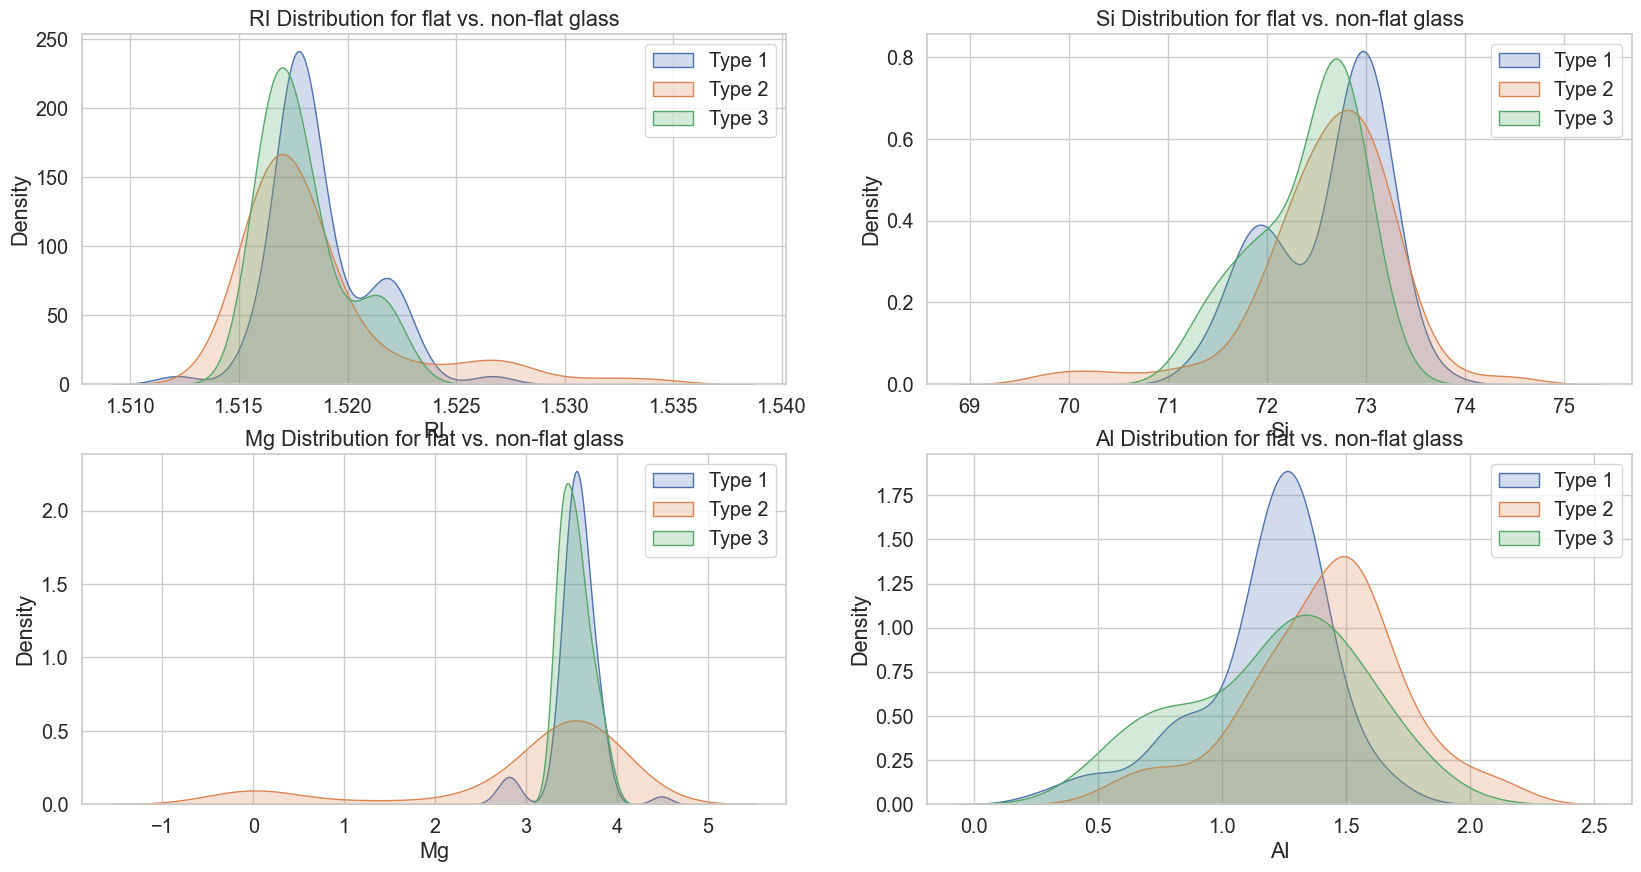

In [36]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(df["RI"][df.Type == 1], shade = True)
sns.kdeplot(df["RI"][df.Type == 2], shade = True)
sns.kdeplot(df["RI"][df.Type == 3], shade = True)
plt.title("RI Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,2)
sns.kdeplot(df["Si"][df.Type == 1], shade = True)
sns.kdeplot(df["Si"][df.Type == 2], shade = True)
sns.kdeplot(df["Si"][df.Type == 3], shade = True)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,3)
sns.kdeplot(df["Mg"][df.Type == 1], shade = True)
sns.kdeplot(df["Mg"][df.Type == 2], shade = True)
sns.kdeplot(df["Mg"][df.Type == 3], shade = True)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,4)
sns.kdeplot(df["Al"][df.Type == 1], shade = True)
sns.kdeplot(df["Al"][df.Type == 2], shade = True)
sns.kdeplot(df["Al"][df.Type == 3], shade = True)
plt.title("Al Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

Mostly the flat ones (1,3) overlap on all the properties except Aluminium. Aluminium has a wider range for type 3 than type 1. The non-float glass, type 2 has many extreme points which make its range very high.


# Feature Selection using PCA
Let us plot a correlation heatmap to identify multicollinearity

<Axes: >

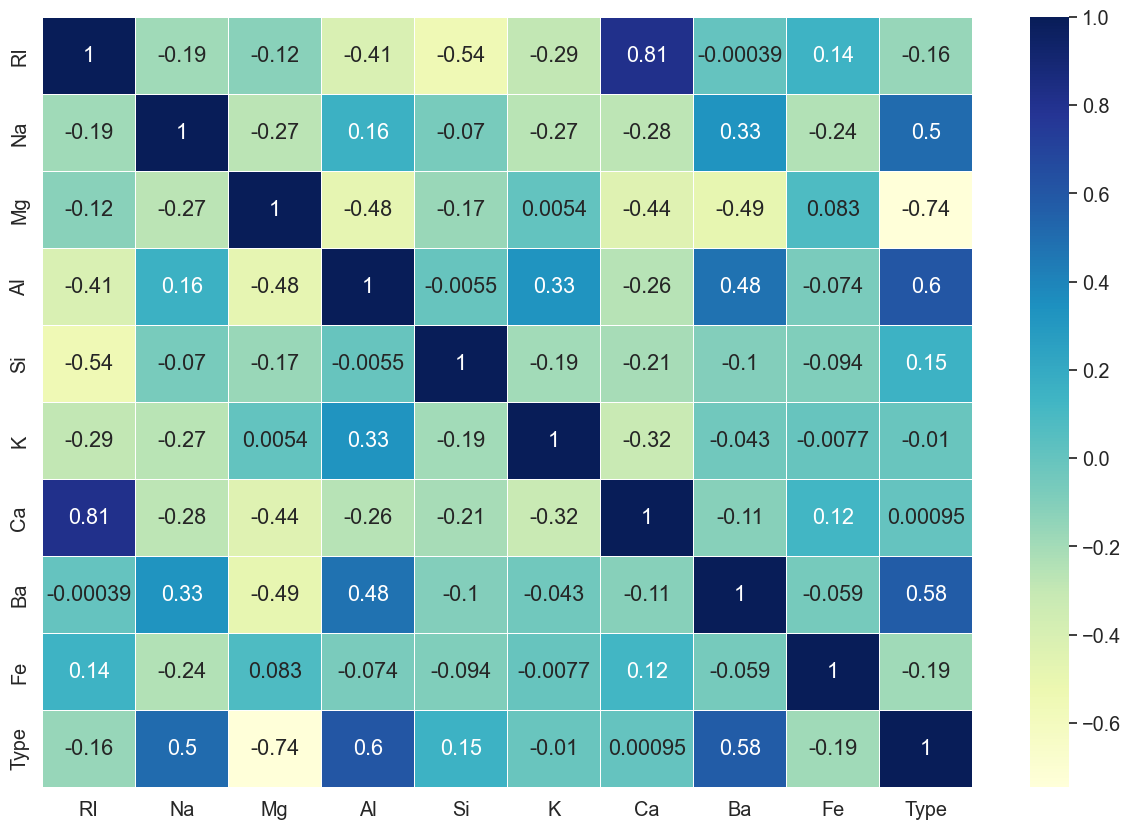

In [37]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

As seen in the pairplot, RI and Ca have a high positive correlation, and Si and RI, negative. But since this is a classification technique and not regression, we cannot simply remove the collinear variables from the model, as they might be able to explain the difference between the target labels.

Let us look at a powerful method called Principal component analysis to decide on the candidate variables. This is valuable as it can help in dimension reduction and lower the cost of data collection.

                     P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.0  1.66  0.68  0.64  0.21  0.1  0.01  0.0  0.0


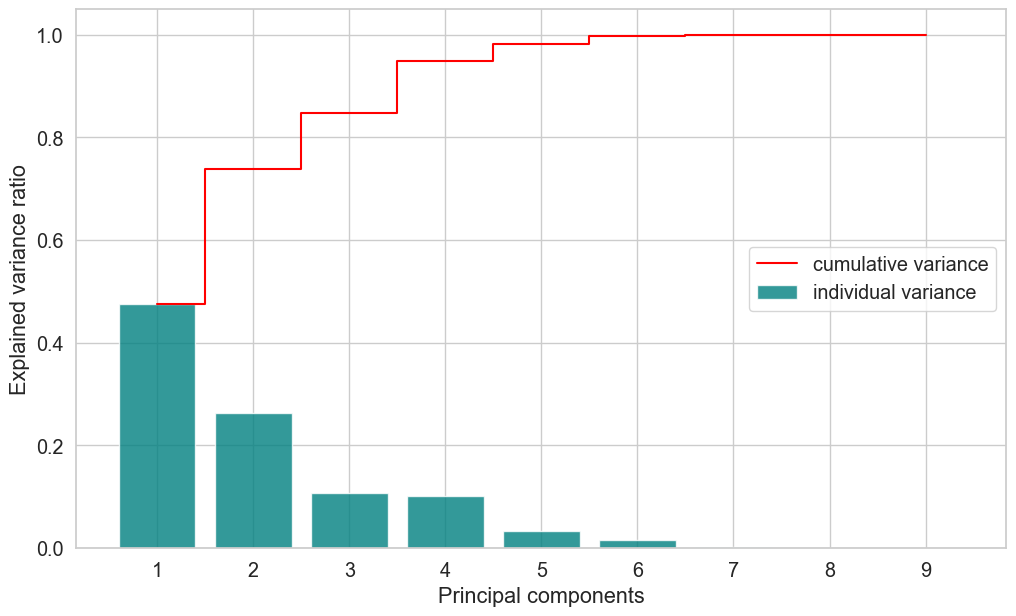

In [38]:
# Performing PCA
X_var = df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

The first 5 components account for about 99% of the total explained variance. We can run the analysis again only with these five components.

In [39]:
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X_var)

Now that we have our features and target labels, let us proceed to model development.

# Model Development

In [40]:
# Separating the response (y) and explanatory (x) variables
X = X_reduced
y = df["Type"].values

In [41]:
# Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Check whether the train and test have instances of all the glass types
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


# Testing Candidate models

In [42]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)

# XGBoost CLassifier
xgbMod = XGBClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
sc2 = metrics.accuracy_score(y_pred,y_test)

# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc5 = metrics.accuracy_score(y_pred,y_test)

In [43]:
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)

[0.1891087  0.34133266 0.18063605 0.23231647 0.05660611]
[0.31377335 0.32296928 0.05489302 0.21178263 0.09658172]


In [44]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc1],['XG Boost',sc2],['Gradient Boost',sc3],
                             ['Decision Tree',sc4],['Random Forest',sc5]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.753846
1,XG Boost,0.753846
2,Gradient Boost,0.676923
3,Decision Tree,0.676923
4,Random Forest,0.738462


SVM gives the highest accuracy and all the features seem to be important from the other models. So, we will retain SVM as our final model and perform hyperparameter tuning to improve it.

# Hyperparameter tuning

In [45]:
tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}


# Running final model

In [46]:
model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.6923076923076923

# Model Performance

Text(269.25, 0.5, 'predicted label')

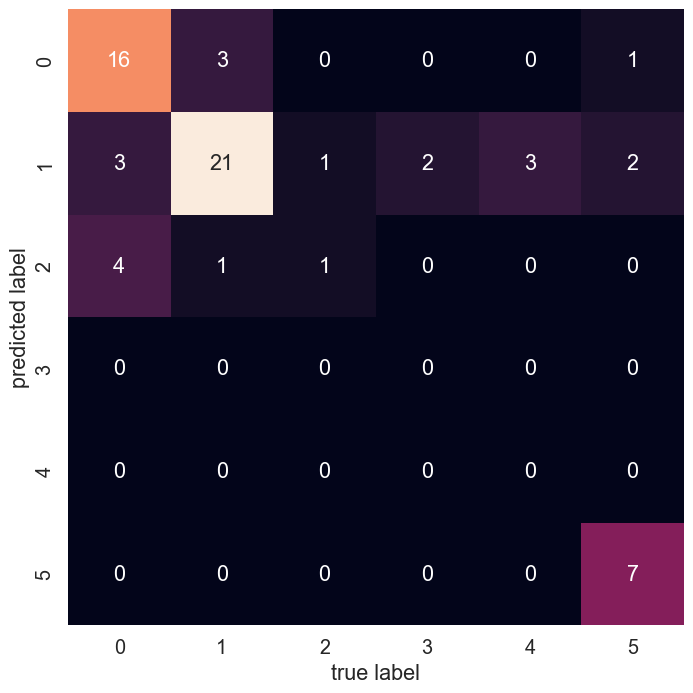

In [47]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.70      0.74        23
           2       0.66      0.84      0.74        25
           3       0.17      0.50      0.25         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       1.00      0.70      0.82        10

    accuracy                           0.69        65
   macro avg       0.44      0.46      0.43        65
weighted avg       0.69      0.69      0.68        65



# Creating an Interactive Component

This is where I create an Interactive component for the user to play around with the model. The first step is to train the model again with the entire dataset and the model and parameters that proved to be the best above. Then the user is presented with interactive sliders (with valid ranges based on the ditribution of the original dataset). The final predicted class of the glass is shown below the sliders as the output. The user can refer to the table above the sliders to see which type does it belong to.

In [49]:
# Training the model with the entire data (Since cross-validation is already done)
svm_mod = SVC(C=10, gamma=0.1, kernel='rbf')
svm_mod.fit(X_var.iloc[:,0:5],y)

SVC(C=10, gamma=0.1)

In [50]:
# Function to be invoked when the slider values are changed
from IPython.display import display
def f(RI, Na, Mg, Al, Si):
    y_val = svm_mod.predict([[RI,Na,Mg,Al,Si]])
    print("The Glass Type is {}".format(y_val))

In [51]:
# Change the values on the slider
interact(f, RI=(1.50,1.54,0.0001),Na=(10.7,17.4),Mg=(0,4.5),Al=(0,3.5),Si=(69,76))

interactive(children=(FloatSlider(value=1.52, description='RI', max=1.54, min=1.5, step=0.0001), FloatSlider(v…

<function __main__.f(RI, Na, Mg, Al, Si)>

# Conclusion
We see that overall model identifies most of the glass types correctly - type 1,2, 5 and 7, but not the rest. It could be due to the dataset being unbalanced in number of instances of each type. There is also some confusion among type 1, 2 and 3 which we had sensed while performing the EDA.

# Learnings:

nbextensions, slideshow in Jupyter Notebook
Dimensionality reduction using PCA
Hyperparamenter tuning using GridSearch
Creating interactive components using ipywidgets
Benefits of Glass identification! :)

# Some Trade-off's:

PCA dimensionality reduction resulted in slightly lower model scores. (Also, the intention was mainly to learn the technique, and performing PCA makes sense when you generally have big data problems (p>>n) for dimensionality reduction)
Grid Search increased the accuracy by fine tuning the parameters but it is computationally expensive.

.

# Thank You